In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


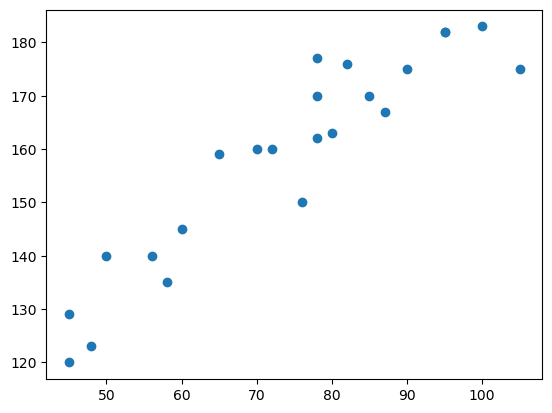

In [3]:
plt.scatter(df['Weight'],df['Height'])

In [7]:
X = df[['Weight']]
y = df['Height']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=38)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled,y_train)

LinearRegression()

In [18]:
model.coef_

array([17.08981566])

In [19]:
model.intercept_

np.float64(157.25)

In [20]:
y_pred_train = model.predict(X_train_scaled)

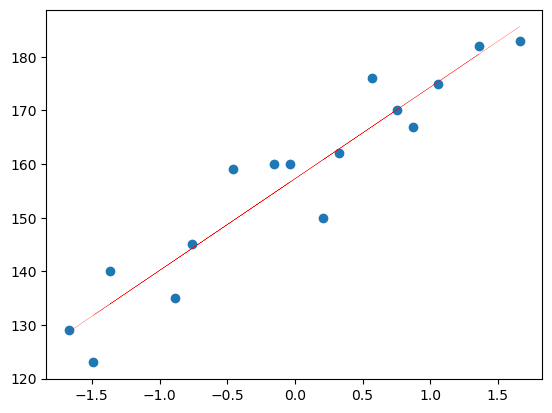

In [24]:
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled,y_pred_train,'r-',lw=0.1)

In [25]:
y_pred_test = model.predict(X_test_scaled)

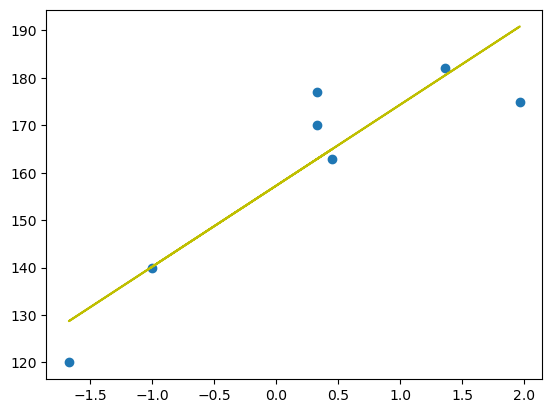

In [28]:
plt.scatter(X_test_scaled,y_test)
plt.plot(X_test_scaled,y_pred_test,'y-')

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_test,y_pred_test)
mse = mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred_test)

mae , rmse , score

(7.051763930102213, np.float64(9.124725719497556), 0.8119921496153479)

In [31]:
# new data point to predict

new_val = 80
x_new_scaled = scaler.transform([[new_val]])

y_new = model.predict(x_new_scaled)
y_new

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([164.9498846])

<Axes: xlabel='Height', ylabel='Count'>

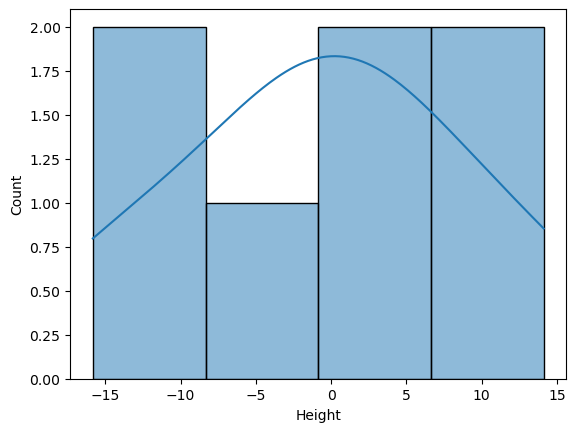

In [32]:
residuals = y_test - y_pred_test

import seaborn as sns
sns.histplot(residuals,kde=True)